In [24]:
#pip install opencv-python
#pip install easydev
#pip install colormap

In [2]:
import matplotlib.pylab as plt
import numpy as np
import cv2
import os
import glob
from mpl_toolkits.mplot3d import Axes3D  
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
from colormap import rgb2hex
import pandas as pd
from sklearn.decomposition import PCA

In [4]:
img_dir = "./data_fruits_tarea" 
data_path = os.path.join(img_dir,'*g')
files = glob.glob(data_path)
data = []
B,G,R=[],[],[]
im_m=np.zeros((np.shape(files)[0],3))
for i,f1 in enumerate(files):
    img = cv2.imread(f1)
    #b=cv2.split(img)
    R.append(cv2.split(img)[0])
    G.append(cv2.split(img)[1])
    B.append(cv2.split(img)[2])
    im_m[i,0]=np.median(img[:,:,0])   #medianR
    im_m[i,1]=np.median(img[:,:,1])   #medianG
    im_m[i,2]=np.median(img[:,:,2])   #medianB
    RGB_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    data.append(RGB_img)


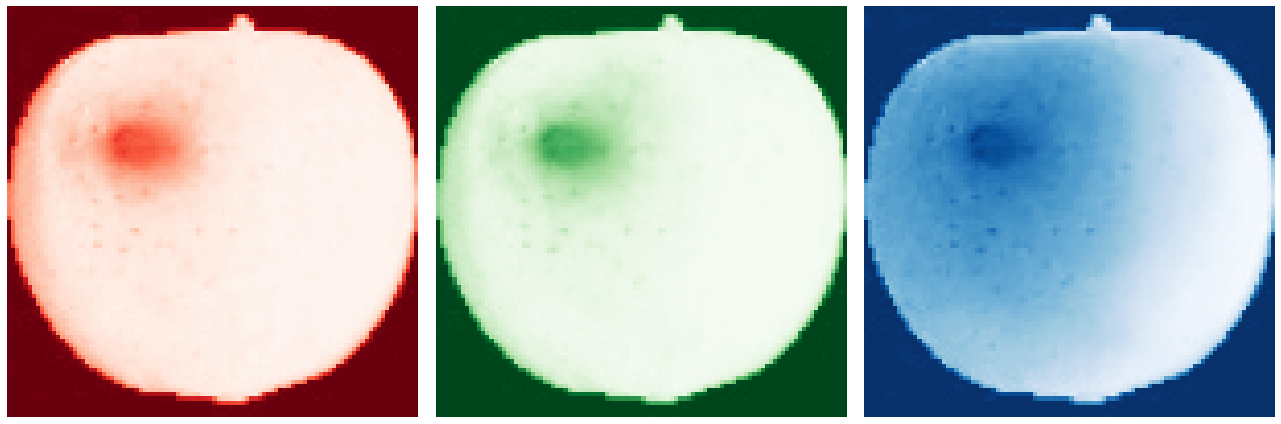

In [5]:
plt.figure(figsize=(18,6))
plt.subplot(1,3,1); plt.imshow(R[0], cmap=plt.cm.Reds); plt.axis('off')
plt.subplot(1,3,2); plt.imshow(G[0], cmap=plt.cm.Greens); plt.axis('off')
plt.subplot(1,3,3); plt.imshow(B[0], cmap=plt.cm.Blues); plt.axis('off')
plt.tight_layout()
plt.show() 

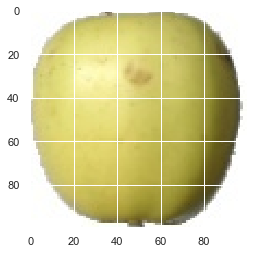

In [478]:
plt.imshow(data[100])

In [474]:
1300/11

118.18181818181819

In [7]:
np.shape(data)

(1300, 100, 100, 3)

In [8]:
medianas=[]
for j in range(np.shape(B)[0]):
    medianas.append(np.array([np.median(B[j]),np.median(G[j]),np.median(R[j])]))
medianas=np.array(medianas)

def rgb2hex(r,g,b):
    return "#{:02x}{:02x}{:02x}".format(r,g,b)
labels=[]

for j in range(np.shape(medianas)[0]):
    labels.append(rgb2hex(int(medianas[j,0]),int(medianas[j,1]),int(medianas[j,2])))
    
#medianas=pd.read_csv('med.csv')[["V1","V2","V3"]].to_numpy()
#labels=(pd.read_csv('labels.csv')["x"]).to_numpy()

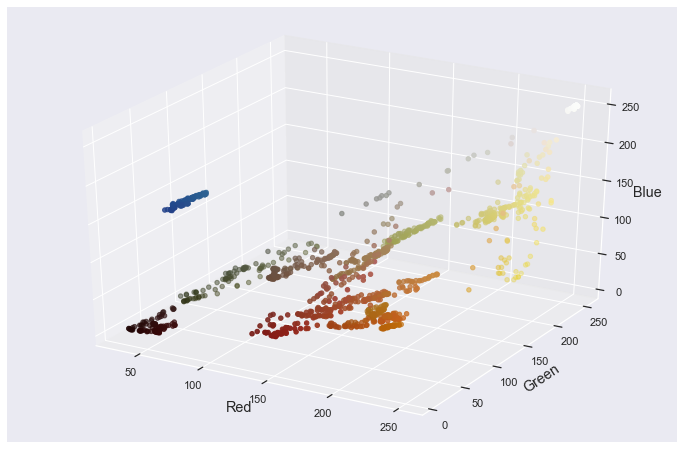

In [9]:
r=medianas[:,0]
g=medianas[:,1]
b=medianas[:,2]
fig = plt.figure(figsize=(12,8))
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

axis.scatter(r, g, b, c=labels, marker="o")
axis.set_xlabel("Red",fontsize="x-large")
axis.set_ylabel("Green",fontsize="x-large")
axis.set_zlabel("Blue",fontsize="x-large")
#plt.title("Gráfico de influencia",fontsize="xx-large")
plt.show()

In [10]:
#n_comp = 40# numero de componentes
pca = PCA(2)
components = pca.fit_transform(medianas) 
#fig = plt.figure(figsize=(15,5)) 
#fig.subplots_adjust(left=0, right=1, bottom=0, top=1.3, hspace=0.05, wspace=0.05) 
# Graficamos los primeros 10 componentes
#faces_train = pca.inverse_transform(train_proj)

Text(0.5, 1.0, 'PCA')

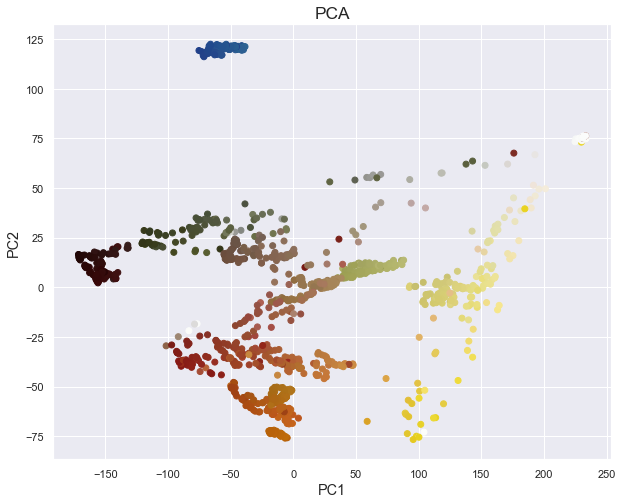

In [11]:
fig = plt.figure(figsize=(10,8)) 
plt.scatter(components[:,0],components[:,1],c=labels)
plt.xlabel("PC1",fontsize="x-large")
plt.ylabel("PC2",fontsize="x-large")
plt.title("PCA",fontsize="xx-large")

In [12]:
sum(pca.explained_variance_ratio_)

0.9754554958483355

In [10]:
explained_variance = np.var(kernel_components, axis=0)
explained_variance_ratio = explained_variance / np.sum(explained_variance)
np.cumsum(explained_variance_ratio)[1]

NameError: name 'kernel_components' is not defined

Text(0.5, 1.0, 'Kernel PCA $\\gamma$=5')

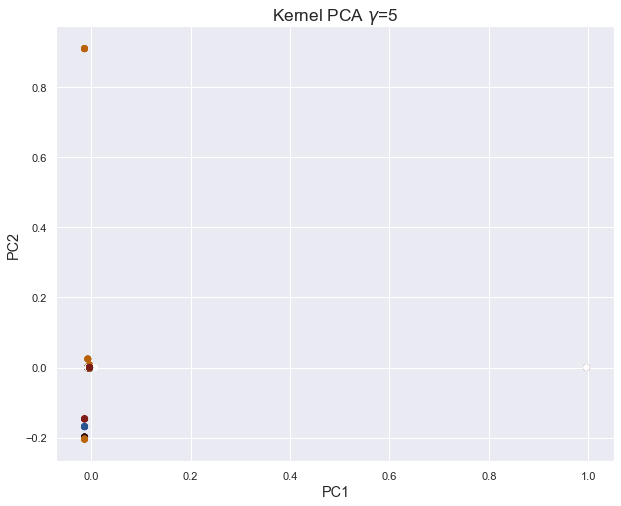

In [14]:
from sklearn.datasets import load_digits
from sklearn.decomposition import KernelPCA
gamma=5
transformer = KernelPCA(3,kernel='rbf',gamma=gamma)
kernel_components = transformer.fit_transform(medianas)
fig = plt.figure(figsize=(10,8)) 
plt.scatter(kernel_components[:,0],kernel_components[:,1],c=labels)
plt.xlabel("PC1",fontsize="x-large")
plt.ylabel("PC2",fontsize="x-large")
plt.title("Kernel PCA $\gamma$="+str(gamma),fontsize="xx-large")
#plt.xlim(-.005,-0.003)
#plt.ylim(-.002,0.002)

In [26]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=11, init='random', n_init=10, max_iter=300, tol=1e-04, random_state=0)
kmeans=kmeans.fit(medianas)
klabels=kmeans.labels_
cent=kmeans.cluster_centers_

In [27]:
#a=(pd.read_csv('kernel.csv')["label"]).to_numpy()
a=(pd.read_csv('kernel.csv')["label"]).to_numpy()
for i in range(11):
    i=i
    print(i+1,"&",np.count_nonzero(klabels == i),"&",np.count_nonzero(a == i+1))

1 & 24 & 143
2 & 161 & 144
3 & 125 & 96
4 & 210 & 95
5 & 116 & 142
6 & 44 & 227
7 & 143 & 34
8 & 100 & 162
9 & 80 & 167
10 & 169 & 21
11 & 128 & 69


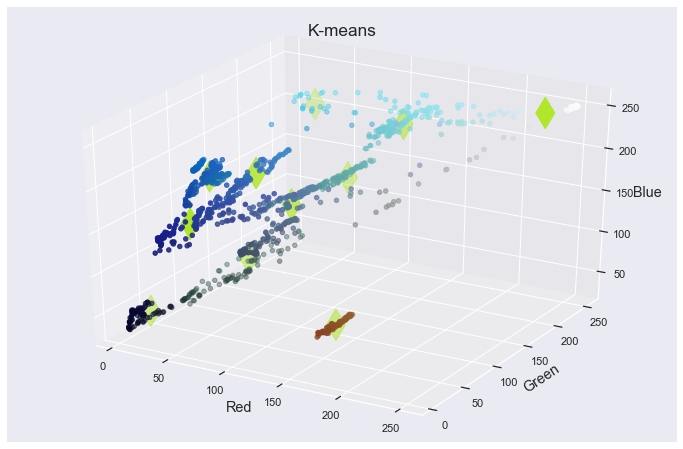

In [28]:
r=medianas[:,0]
g=medianas[:,1]
b=medianas[:,2]
fig = plt.figure(figsize=(12,8))
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

axis.scatter(r, g, b, c=labels, marker="o")
axis.scatter(cent[:,0],cent[:,1],cent[:,2], marker="d",c="#b0e629",s=500)
axis.set_xlabel("Red",fontsize="x-large")
axis.set_ylabel("Green",fontsize="x-large")
axis.set_zlabel("Blue",fontsize="x-large")
plt.title("K-means",fontsize="xx-large")
plt.show()

In [447]:
#pd_kernel=(pd.read_csv('kernel.csv')["x"]).to_numpy()

In [445]:
pd.read_csv('kernel.csv')

,Unnamed: 0,label,red,green,blue,R,G,B
0,983,8,0.556863,0.125490,0.098039,0.571985,0.202638,0.130315
1,984,8,0.556863,0.125490,0.101961,0.571985,0.202638,0.130315
2,985,8,0.552941,0.125490,0.098039,0.571985,0.202638,0.130315
3,986,8,0.549020,0.117647,0.094118,0.571985,0.202638,0.130315
4,987,8,0.545098,0.117647,0.094118,0.571985,0.202638,0.130315
...,...,...,...,...,...,...,...,...
1295,1102,8,0.513725,0.145098,0.113725,0.571985,0.202638,0.130315
1296,1103,8,0.513725,0.145098,0.113725,0.571985,0.202638,0.130315
1297,1068,8,0.513725,0.141176,0.109804,0.571985,0.202638,0.130315
1298,1096,8,0.505882,0.141176,0.113725,0.571985,0.202638,0.130315


In [446]:
labels_kernel=(pd.read_csv('label_kernel.csv')["x"]).to_numpy()
cent_kernel=(pd.read_csv('centroides.csv')[["V1","V2","V3"]]).to_numpy()

In [483]:
a=(pd.read_csv('kernel.csv')["label"]).to_numpy()
for i in range(11):
    i=i+1
    print(i,np.count_nonzero(a == i))

1 143
2 144
3 96
4 95
5 142
6 227
7 34
8 162
9 167
10 21
11 69


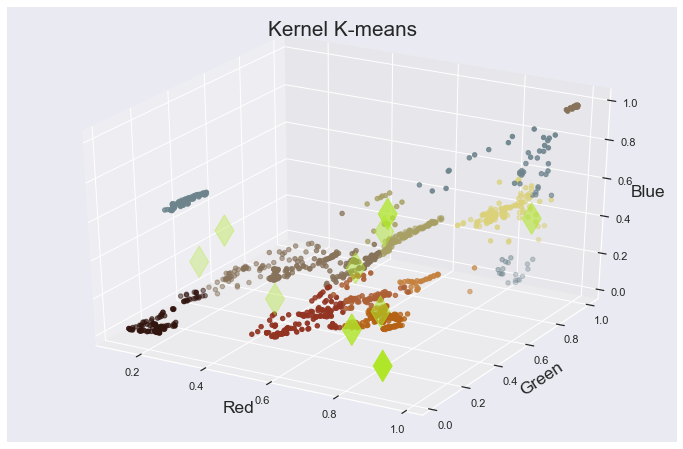

In [462]:
r=medianas[:,0]
g=medianas[:,1]
b=medianas[:,2]
fig = plt.figure(figsize=(12,8))
axis = fig.add_subplot(1, 1, 1, projection="3d") # 3D plot with scalar values in each axis

axis.scatter(r, g, b, c=labels_kernel, marker="o")
axis.scatter(cent[:,0],cent_kernel[:,1],cent_kernel[:,2], marker="d",c="#b0e629",s=500)
axis.set_xlabel("Red",fontsize="x-large")
axis.set_ylabel("Green",fontsize="x-large")
axis.set_zlabel("Blue",fontsize="x-large")
plt.title("Kernel K-means",fontsize="xx-large")
plt.show()

In [ ]:
K-means
0 176
1 160
2 128
3 50
4 100
5 125
6 128
7 190
8 125
9 118

Kernel
1 125
2 150
3 32
4 143
5 81
6 280
7 171
8 139
9 18
10 161
